In [2]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

In [6]:
dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(
    'DATASET', 
    shuffle = True, image_size = (64,64), batch_size = 25)

Found 900 files belonging to 36 classes.


In [7]:
len(dataset)

36

In [11]:
class_names = dataset.class_names
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(25, 64, 64, 3)
[28 25 18 33  3 32 17 10 28 25 33  4 21  8 15 26 32 34 34 22 17 17 31  0
 22]


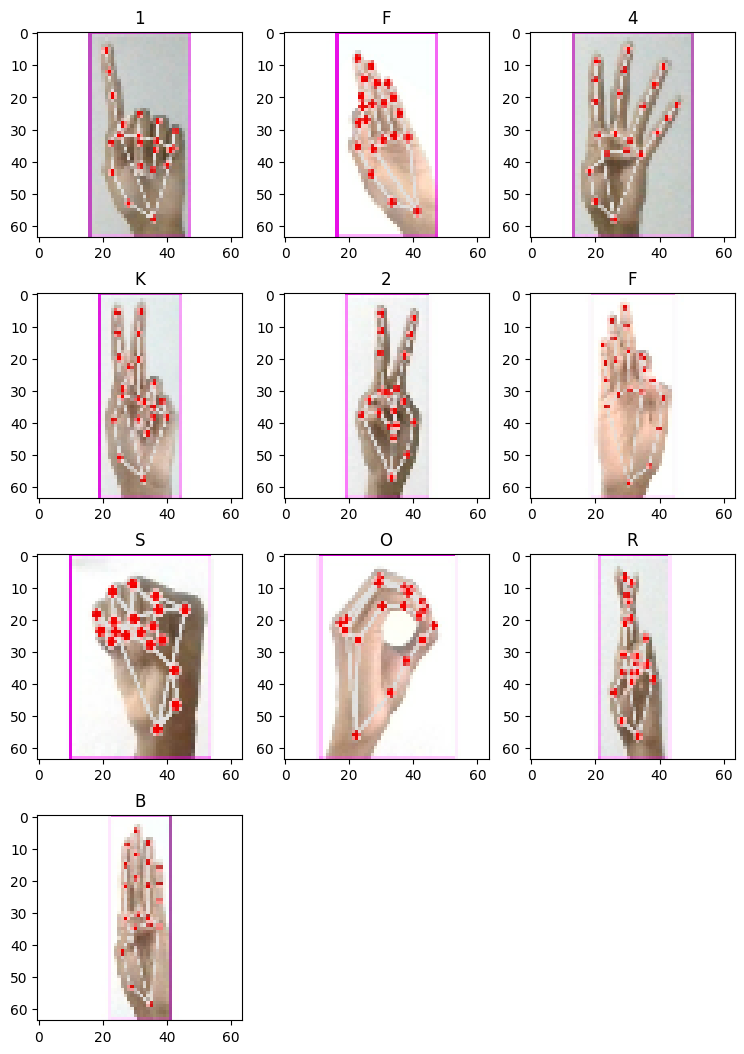

In [14]:
plt.figure(figsize=(9,13))
for image_batch, label_batch in dataset.take(1):
    for r in range(10):
        plot = plt.subplot(4,3,r+1)
        plt.imshow(image_batch[r].numpy().astype("uint8"))
        plt.title(class_names[label_batch[r]])

In [15]:
train_data = .8
len(dataset)*train_data

28.8

In [16]:
train_data = dataset.take(28)
len(train_data)

28

In [17]:
test_data = .1
len(dataset)*test_data

3.6

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 585,380 (2.23 MB)

 Trainable params: 585,380 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.0368 - loss: 54.2488 - val_accuracy: 0.0400 - val_loss: 3.5167
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.0683 - loss: 3.4881 - val_accuracy: 0.2320 - val_loss: 3.0543
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.2708 - loss: 2.8271 - val_accuracy: 0.5520 - val_loss: 1.8323
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.5542 - loss: 1.6389 - val_accuracy: 0.7200 - val_loss: 1.0627
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7402 - loss: 0.8151 - val_accuracy: 0.8080 - val_loss: 0.6155
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.8868 - loss: 0.4560 - val_accuracy: 0.9520 - val_loss: 0.2433
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9387 - loss: 0.2221 - val_accuracy: 0.9680 - val_loss: 0.2183
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9813 - loss: 0.0895 - val_accuracy: 0.920

Text(0.5, 1.0, 'training and validation loss')

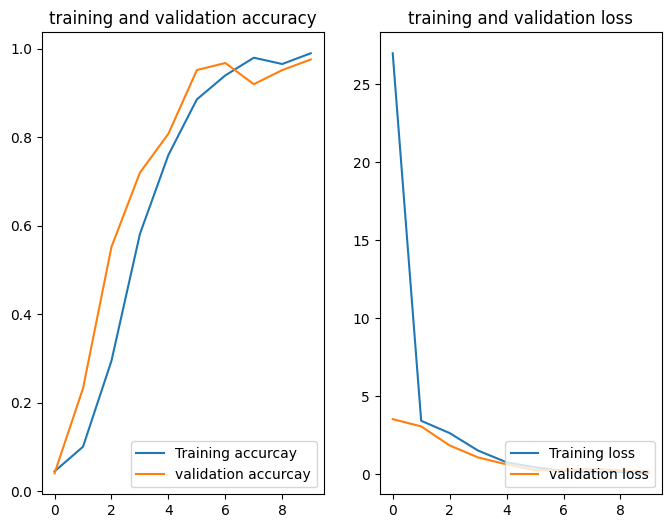

In [19]:
def get_dataset_partitions_tf(ds, train_split = .8, val_split = .1, test_split = .1, shuffle = True, shuffle_size = 1000):
    ds_size  = len(dataset)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
        train_size = int(train_split*ds_size)
        val_size = int(val_split*ds_size)

        train_ds  = ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size + val_size)
        return train_ds,val_ds, test_ds
train_ds, test_ds, val_ds  = get_dataset_partitions_tf(dataset)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tensorflow.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tensorflow.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = tensorflow.data.AUTOTUNE)
from tensorflow.keras import layers, models
resize_rescale = tensorflow.keras.Sequential([
  layers.Resizing(64,64),
  layers.Rescaling(1.0/255)
])
data_augmentation = tensorflow.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential

input_shape = (64,64,3)
n_classes = 36

resize_rescale
data_augmentation

model = models.Sequential([

    layers.Input(shape = input_shape),

    layers.Conv2D(32, (3,3),padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (3,3),padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
 

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(36,activation='softmax')



])

model.summary()
from keras.callbacks import EarlyStopping
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'] )
history = model.fit(train_ds,epochs=10, verbose = 1, validation_data = val_ds)
score = model.evaluate(test_ds)
score
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss  = history.history['val_loss']
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
plt.plot(range(10), acc, label = "Training accurcay")
plt.plot(range(10), val_acc, label = "validation accurcay")
plt.legend(loc='lower right')
plt.title("training and validation accuracy")



plt.subplot(1,2,2)
plt.plot(range(10), loss, label = "Training loss")
plt.plot(range(10), val_loss, label = "validation loss")
plt.legend(loc='lower right')
plt.title("training and validation loss")

first image to predict
actual:   S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
predicted lable:  S


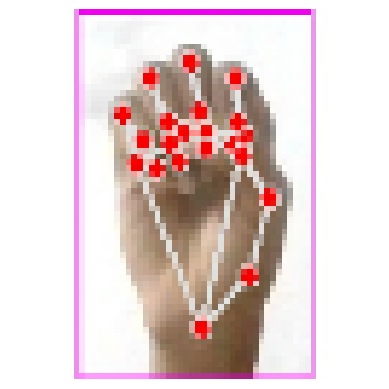

In [20]:
for image_batch, lable_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    plt.axis('off')
    first_lable = lable_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual:  ", class_names[first_lable])

    batch_prediction = model.predict(image_batch)
    print("predicted lable: ", class_names[np.argmax(batch_prediction[0])])
def predict (model, img):
    img_array = tensorflow.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tensorflow.expand_dims(img_array, 0) #create batch
    
    
    predictions = model.predict(img_array)

    predicted_class =class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


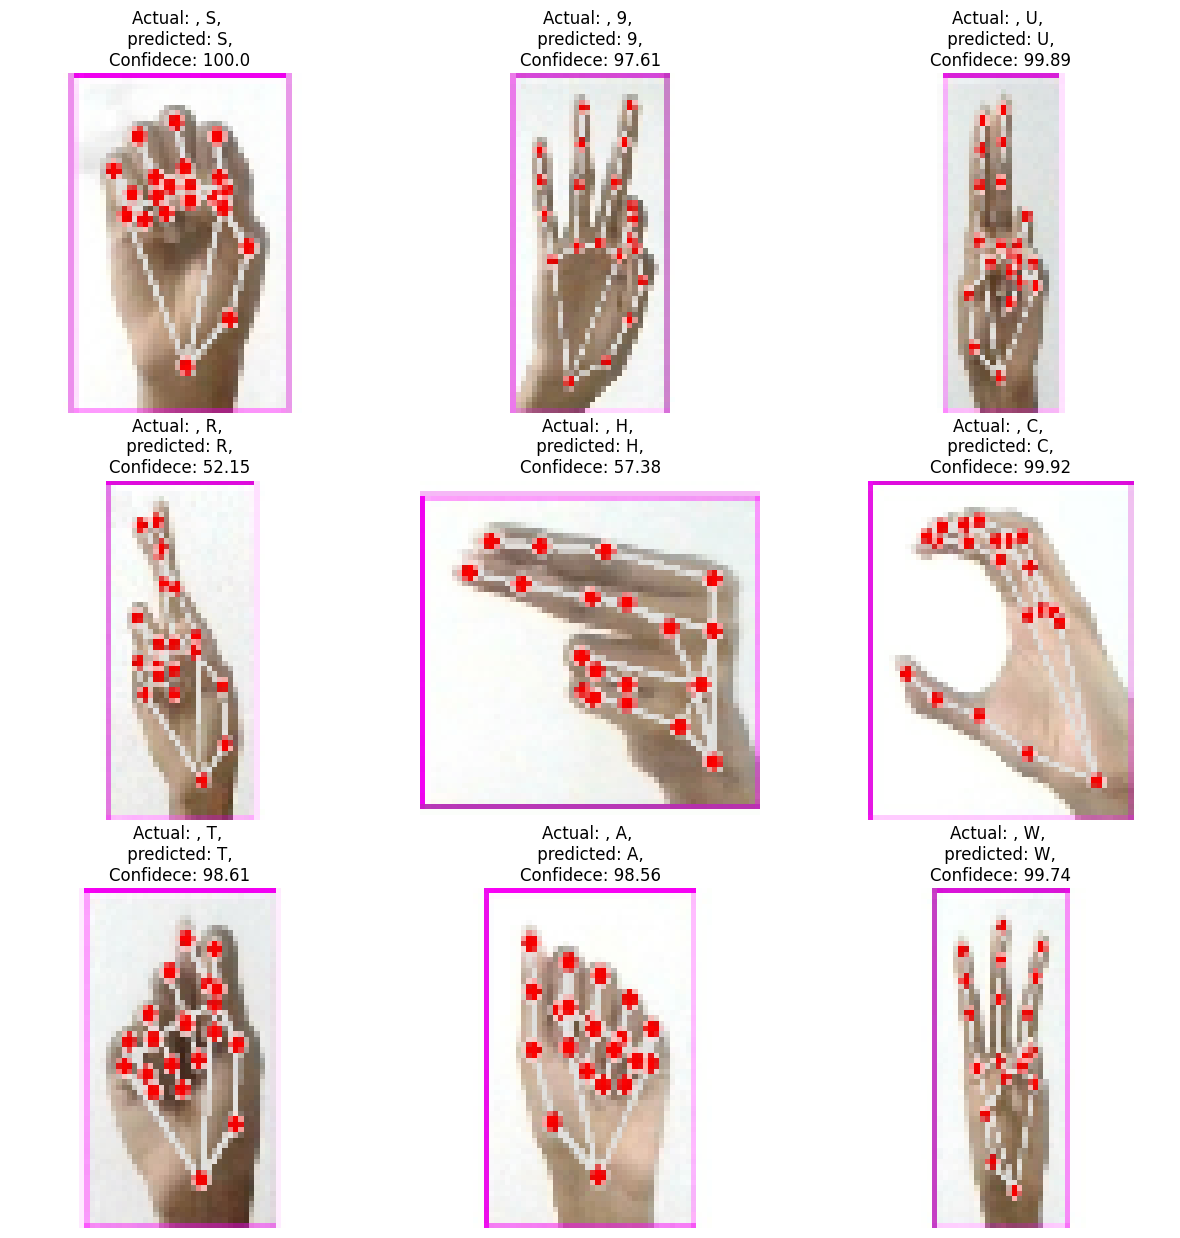

In [21]:
plt.figure(figsize=(15,15))
for images, lables in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8")) 
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[lables[i]]
        plt.title(f"Actual: , {actual_class}, \n predicted: {predicted_class}, \nConfidece: {confidence}")
        plt.axis('off')

In [22]:
model.save('model.h5')